🔹 First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  ----

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


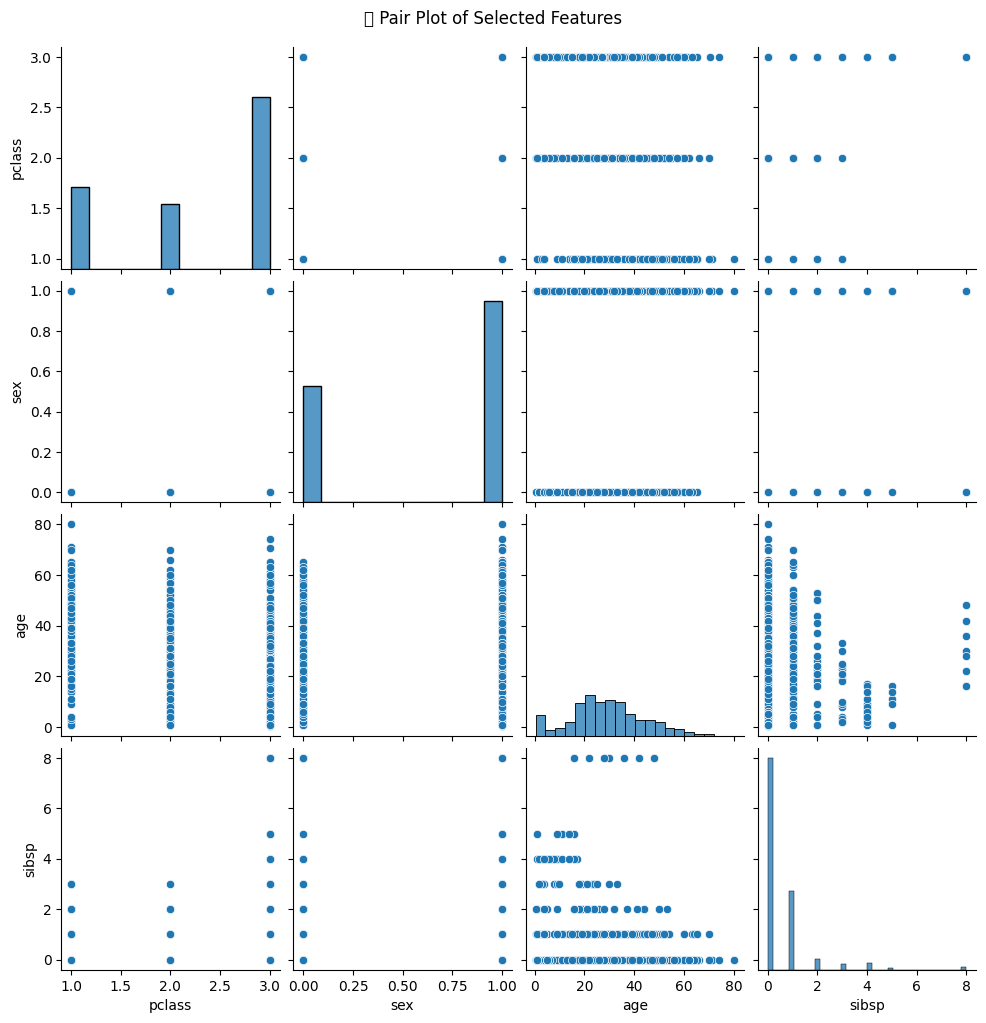

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


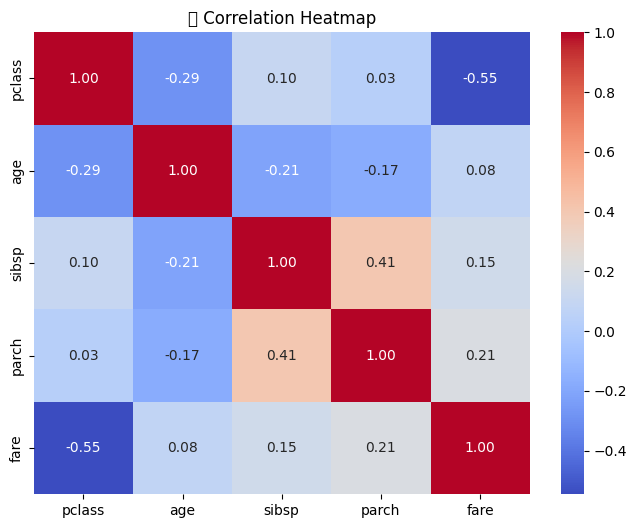

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

titanic_df = sns.load_dataset('titanic')

print("🔹 First 5 rows:")
print(titanic_df.head())

print("\n🔹 Dataset Info:")
print(titanic_df.info())

print("\n🔹 Missing values per column:")
print(titanic_df.isnull().sum())

titanic_df['age'] = titanic_df['age'].ffill().bfill()

titanic_df['deck'] = titanic_df['deck'].cat.add_categories(['Unknown'])
titanic_df['deck'] = titanic_df['deck'].fillna('Unknown', limit=5)

before = len(titanic_df)
titanic_df.drop_duplicates(inplace=True)
after = len(titanic_df)
print(f"\n🔹 Duplicates removed: {before - after}")

le = LabelEncoder()
titanic_df['sex'] = le.fit_transform(titanic_df['sex'])  # male:1, female:0

scaler = StandardScaler()
titanic_df['fare'] = scaler.fit_transform(titanic_df[['fare']])

sns.pairplot(titanic_df[['pclass', 'sex', 'age', 'sibsp']])
plt.suptitle("🔍 Pair Plot of Selected Features", y=1.02)
plt.show()
selected_features = ['pclass', 'age', 'sibsp', 'parch', 'fare']
plt.figure(figsize=(8, 6))
sns.heatmap(titanic_df[selected_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📊 Correlation Heatmap")
plt.show()
